# The Amsterdam Resources for doing Computational Social Science
## Basic statistics and visualizations

(c) Damian Trilling

Thank you for using our resources. 

Chances are high that you use Python mainly because of its capabilities of dealing with text or for programming some scraper or API client.

But Python can also just do ordinary statistics and soke

We will use pandas and statsmodels today to show how the data analysis can be done completely in Python. We will do so by using a number of modules, most notably pandas.

Pandas is a package that allows us to work with datasets in a similar manner as in R (with dataframes) and, according to their own website, has the objective of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. 

It's up to you to decide whether that is (already) true or not, but this tutorial will demonstrate some of its capabilities. We also use statsmodels to do some of the statistical analysis, in a workflow integrated with Pandas.

The dataset we use in this example is a subset of the data presented in
Trilling, D. (2013). *Following the news. Patterns of online and offline news use*. PhD thesis, University of Amsterdam. http://hdl.handle.net/11245/1.394551


### Import stuff
First we import the pandas (usually imported as "pd"), and statsmodels/numpy. We also use matplotlib for some visualizations. We also already import a lot of other stuff we will need for some specific analyses later on; you don't have to care about all of them right now.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import kendalltau
import numpy as np

### Read data into a dataframe
We will read a dataset based on Trilling (2013). It contains some sociodemographic variables as well as the number of days the respondent uses a specific medium to access information about news and current affairs.

In [2]:
df = pd.read_csv('mediause.csv')

In [3]:
df.keys()

Index(['gender', 'age', 'education', 'radio', 'newspaper', 'tv', 'internet'], dtype='object')

In [4]:
df

,gender,age,education,radio,newspaper,tv,internet
0,1,71,4.0,5,6,5,0
1,1,40,2.0,6,0,0,0
2,1,41,2.0,4,3,7,3
3,0,65,5.0,0,0,5,0
4,0,39,2.0,0,1,7,7
5,1,45,6.0,4,2,3,3
6,1,57,3.0,5,7,2,0
7,0,41,7.0,7,0,7,7
8,1,37,6.0,7,6,3,7
9,1,69,5.0,6,6,7,0


### Explore the dataset
Let's do some descriptive statistics

In [5]:
df.describe()

,gender,age,education,radio,newspaper,tv,internet
count,2081.000000,2081.000000,2065.000000,2081.000000,2081.000000,2081.000000,2081.000000
mean,0.481499,46.073522,4.272639,3.333974,3.111004,4.167227,2.684286
std,0.499778,18.267401,1.661451,2.699082,2.853082,2.517039,2.786262
min,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,3.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,46.000000,4.000000,4.000000,3.000000,5.000000,2.000000
75%,1.000000,61.000000,6.000000,6.000000,6.000000,7.000000,5.000000
max,1.000000,95.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
df['gender'].value_counts()

0    1079
1    1002
Name: gender, dtype: int64

In [7]:
df['education'].value_counts(sort=False)

4.0    667
2.0    323
5.0    178
6.0    396
3.0    214
7.0    219
1.0     68
Name: education, dtype: int64

Of course, you can integrate all this in normal Python structures like for-loops:

In [8]:
for medium in ['radio','newspaper','tv','internet']:
    print(medium.upper())
    print(df[medium].value_counts(sort=True, normalize=True))
    print('-------------------------------------------\n')

RADIO
0    0.292167
7    0.199904
5    0.169149
3    0.082653
4    0.075925
2    0.066314
6    0.058145
1    0.055742
Name: radio, dtype: float64
-------------------------------------------

NEWSPAPER
0    0.356559
6    0.252763
7    0.126862
1    0.081211
2    0.061028
5    0.055262
3    0.038443
4    0.027871
Name: newspaper, dtype: float64
-------------------------------------------

TV
7    0.271024
5    0.149447
0    0.143681
6    0.112446
4    0.095147
3    0.082653
2    0.074003
1    0.071600
Name: tv, dtype: float64
-------------------------------------------

INTERNET
0    0.389716
7    0.197021
1    0.090822
2    0.083614
3    0.072081
5    0.069678
4    0.049976
6    0.047093
Name: internet, dtype: float64
-------------------------------------------



Also, you can 'chain' different methods together and for example first group a dataframe and then call the .describe() method on the results:

In [9]:
df.groupby('gender').describe()

age                                                     education  \
         count       mean        std   min   25%   50%   75%   max     count   
gender                                                                         
0       1079.0  44.744208  17.508053  13.0  30.0  44.0  59.0  86.0    1072.0   
1       1002.0  47.504990  18.956032  13.0  33.0  47.0  63.0  95.0     993.0   

                 ...  radio           tv                                     \
            mean ...    75%  max   count      mean       std  min  25%  50%   
gender           ...                                                          
0       4.212687 ...    5.0  7.0  1079.0  4.075996  2.529193  0.0  2.0  5.0   
1       4.337362 ...    6.0  7.0  1002.0  4.265469  2.501425  0.0  2.0  5.0   

                  
        75%  max  
gender            
0       7.0  7.0  
1       7.0  7.0  

[2 rows x 48 columns]

In [10]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of


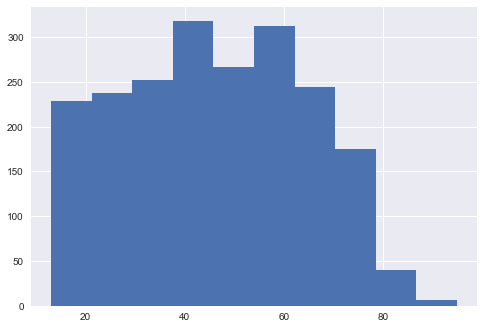

In [11]:
df['age'].hist()

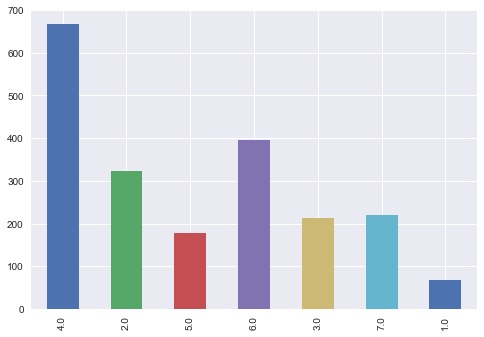

In [12]:
df['education'].value_counts(sort=False).plot(kind='bar')

You could integrate this in your for-loop above to get a nice series of plots...

But we can also have a histogram split up by some category:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d2b6c50>,
      dtype=object)

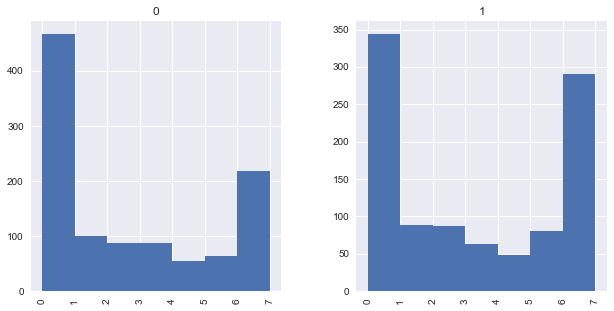

In [13]:
df.hist(column='internet', by=['gender'], bins=7, figsize=(10,5))

### Statistical tests and subsetting datasets
Let's stop with the describtive stuff and do some statistical tests...

For instance, we can do a t-test. The results return the test statistic, p-value, and the degrees of freedom. 

Here, notice that we are using the ability to filter a dataframe (e.g., *df[df['gender']==1]*  creates a dataframe only males; adding *['internet']* at the end selects only the column for internet).

In [14]:
males_internet = df[df['gender']==1]['internet']
females_internet = df[df['gender']==0]['internet']


In [15]:
males_internet.describe()

count    1002.000000
mean        3.021956
std         2.856809
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max         7.000000
Name: internet, dtype: float64

In [16]:
females_internet.describe()

count    1079.000000
mean        2.370714
std         2.682610
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max         7.000000
Name: internet, dtype: float64

In [17]:
ttest_ind(males_internet,females_internet)

(5.363006854632655, 9.094061516694724e-08, 2079.0)

We see that males use the internet significantly more often than females. We could also do some pretty-printing if we wanted to:

In [18]:
results = ttest_ind(males_internet,females_internet)
print('t({2:.0f}) = {0:.3f}, p = {1:.3F}'.format(*results))

t(2079) = 5.363, p = 0.000


Let's look into some continous variables. First of all, let us create one: We make a subset of our dataframe that contains only the media variables, apply the .mean() function to it (axis = 1 means that we want to apply it row-wise), and then we assign the result of this to a new colum in the original dataframe

In [19]:
df['meanmedia'] = df[['radio','internet','newspaper','tv']].mean(axis=1)

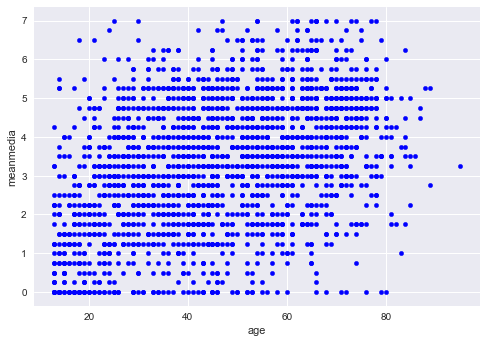

In [20]:
df.plot.scatter(x='age', y='meanmedia', c='blue')


Let's turn to multivariate analyses and see whether the difference between genders holds when we control for political interest. On the way, I'll show you how to merge different datasets:

In [21]:
intpol=pd.read_csv('intpol.csv')

In [22]:
combined = df.join(intpol)

In [23]:
combined

,gender,age,education,radio,newspaper,tv,internet,meanmedia,intpol
0,1,71,4.0,5,6,5,0,4.00,4
1,1,40,2.0,6,0,0,0,1.50,1
2,1,41,2.0,4,3,7,3,4.25,4
3,0,65,5.0,0,0,5,0,1.25,4
4,0,39,2.0,0,1,7,7,3.75,1
5,1,45,6.0,4,2,3,3,3.00,6
6,1,57,3.0,5,7,2,0,3.50,1
7,0,41,7.0,7,0,7,7,5.25,6
8,1,37,6.0,7,6,3,7,5.75,5
9,1,69,5.0,6,6,7,0,4.75,7


Let's do an OLS regression. In order to do so, we need to define a model and then run it. When defining the model, you create the equation in the following manner:
* First you include your dependent variable, followed by the ~ sign
* Then you include the independent variables (separated by the + sign)

In [24]:
m1 = smf.ols(formula='internet ~ age + gender + education', data=combined).fit()

In [25]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               internet   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     63.91
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.65e-39
Time:                        13:53:29   Log-Likelihood:                -4951.8
No. Observations:                2065   AIC:                             9912.
Df Residuals:                    2061   BIC:                             9934.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1512      0.233      4.941      0.000       0.694       1.608
age           -0.0119      0.003     -3.675      0.000      -0.018      -0.006
gender         0.6224      0.118      5.283      0.000       0.391       0.853
education      0.4175      0.035     11.763      0.000       0.348       0.487
==============================================================================
Omnibus:                      976.493   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.053
Skew:                           0.481   Prob(JB):                     2.41e-41
Kurtosis:                       1.882   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
m2 = smf.ols(formula='internet ~ age + gender + education + intpol', data=combined).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               internet   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     57.45
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           5.12e-46
Time:                        17:18:17   Log-Likelihood:                -4934.5
No. Observations:                2065   AIC:                             9879.
Df Residuals:                    2060   BIC:                             9907.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0389      0.232      4.481      0.000         0.584     1.494
age           -0.0196      0.003     -5.642      0.000        -0.026    -0.013
gender         0.5212      0.118      4.413      0.000         0.290     0.753
education      0.3447      0.037      9.240      0.000         0.272     0.418
intpol         0.2230      0.038      5.910      0.000         0.149     0.297
==============================================================================
Omnibus:                      763.270   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.407
Skew:                           0.483   Prob(JB):                     1.10e-39
Kurtosis:                       1.926   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can also do a test to see whether M2 is better than M1 (it is, in this case:)
(see also [http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.compare_lr_test.html]

In [27]:
m2.compare_lr_test(m1)

(34.717331142930561, 3.8122257183791596e-09, 1.0)

### Before we finish, some playing around with graphics
The seaborn library offers a lot of cool stuff

In [28]:
corrmatrix = df[['internet','tv','radio','newspaper']].corr()

In [29]:
corrmatrix

,internet,tv,radio,newspaper
internet,1.000000,0.121192,0.098797,-0.005689
tv,0.121192,1.000000,0.270031,0.350694
radio,0.098797,0.270031,1.000000,0.230926
newspaper,-0.005689,0.350694,0.230926,1.000000


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


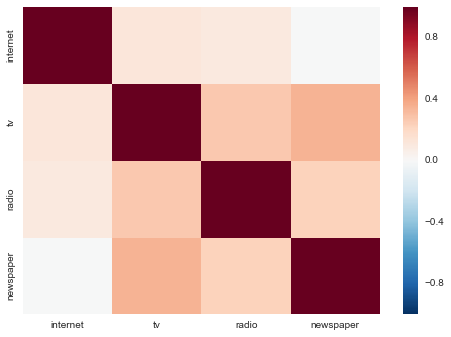

In [30]:
sns.heatmap(corrmatrix)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


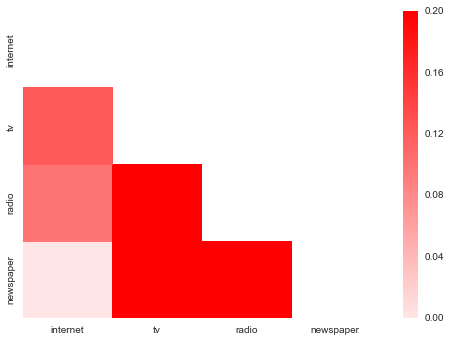

In [31]:
sns.set(style="white")
mask = np.zeros_like(corrmatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette("red",as_cmap=True)
sns.heatmap(corrmatrix,mask=mask,cmap=cmap,vmin=0,vmax=.2)

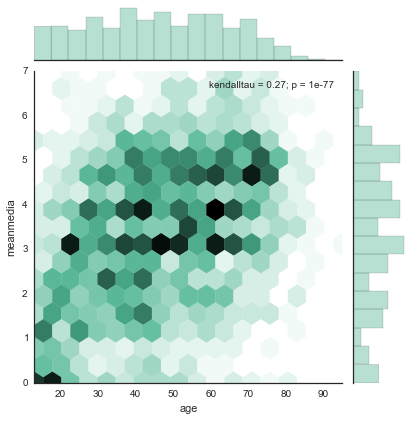

In [32]:
sns.jointplot(combined['age'], combined['meanmedia'] , 
              kind="hex", stat_func=kendalltau, color="#4CB391")

In [33]:
from scipy.stats import pearsonr, mannwhitneyu

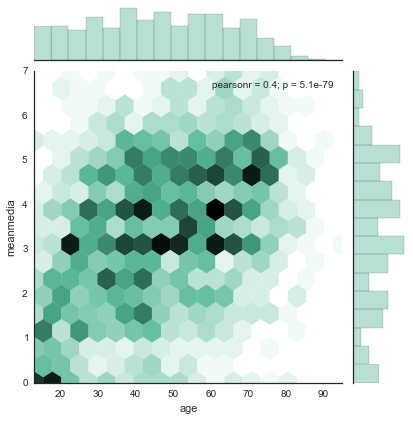

In [34]:
sns.jointplot(combined['age'], combined['meanmedia'] , 
              kind="hex", stat_func=pearsonr, color="#4CB391")

# More information
If you are interested in using Python for your statistical analyses, you may want to consult:

- 10-minute video showcasing the possibilities of Pandas: https://vimeo.com/59324550
- And doing a deep dive in the Pandas documentation :-) http://pandas.pydata.org/
- And of course our other Notebooks...